In [1]:
from qiskit import *  

In [2]:
from qiskit.circuit import Parameter 
from qiskit.visualization import plot_circuit_layout, plot_gate_map, plot_histogram, plot_state_paulivec, plot_bloch_multivector

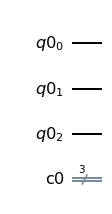

In [3]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr,cr)
circuit.draw(output='mpl')

In [4]:
theta = Parameter('theta')
phi = Parameter('phi')
n = 4
for i in range(n):
    circuit.rz(theta,qubit=0)
    circuit.rz(theta,qubit=1)
    circuit.rz(theta,qubit=2)
    circuit.rxx(phi,qubit1=0,qubit2=1)
    circuit.rxx(phi,qubit2=1,qubit1=2) 

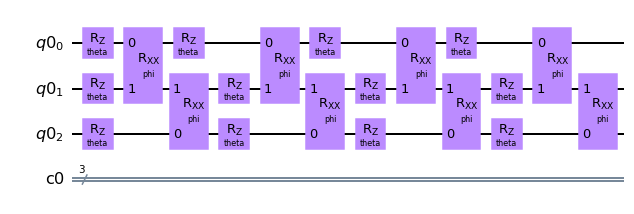

In [5]:
circuit.draw(output ='mpl')

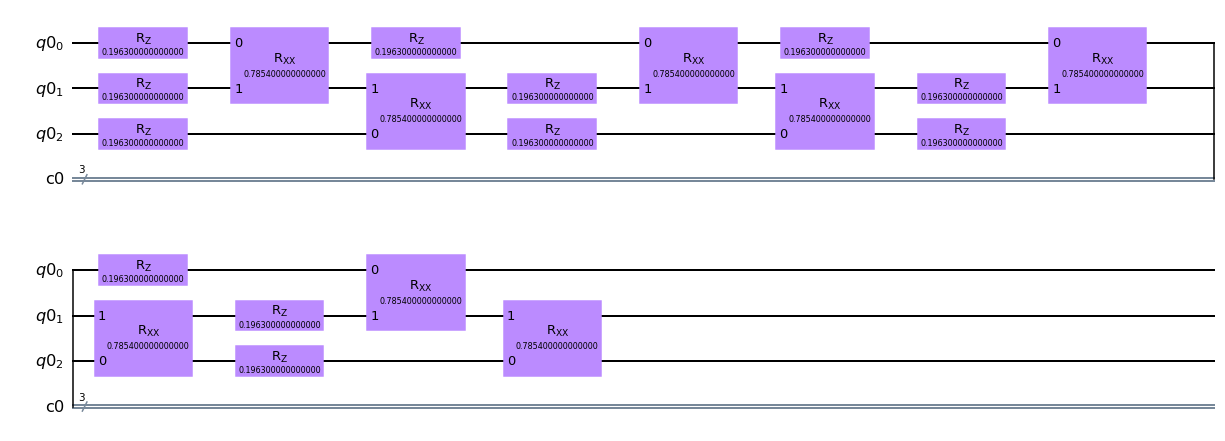

In [6]:
bound_circuit = circuit.bind_parameters((3.1416/4, 0.1963))
bound_circuit.draw()

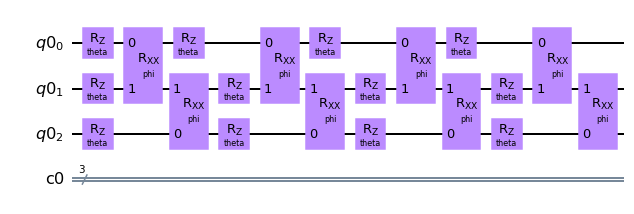

In [7]:
circuit.draw('mpl')

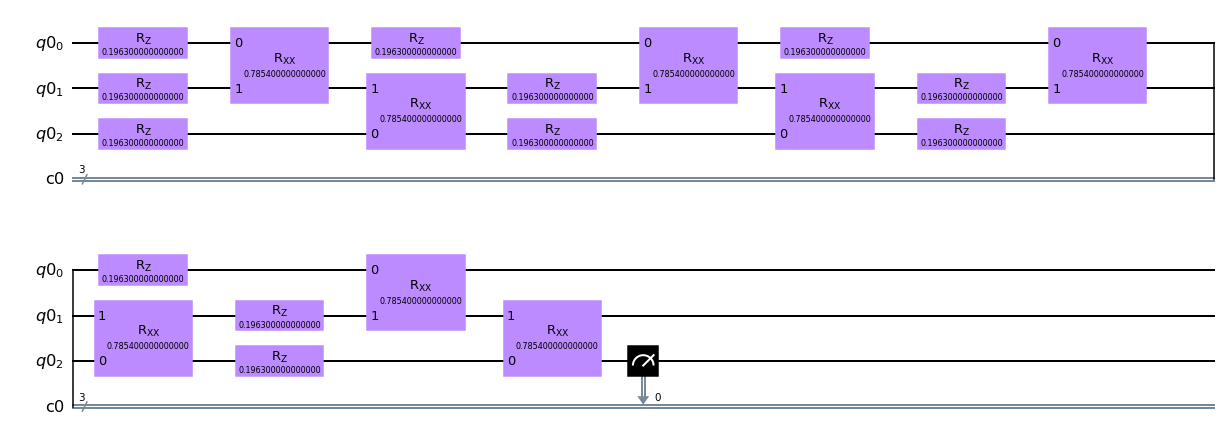

In [8]:
bound_circuit.measure(2,0)
#bound_circuit.measure(1,1)
bound_circuit.draw('mpl')


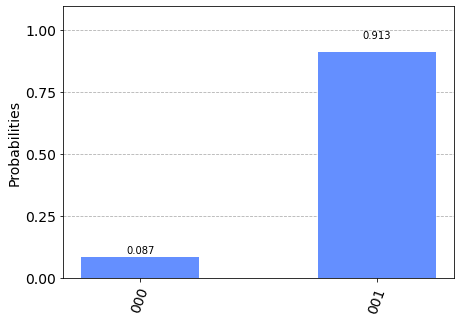

In [9]:
from qiskit.tools.visualization import plot_histogram
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(bound_circuit).result()
counts = result.get_counts(bound_circuit)
plot_histogram(counts)

In [10]:
from qiskit.tools.visualization import plot_state_paulivec
backend = BasicAer.get_backend('statevector_simulator')
result = backend.run(transpile(bound_circuit, backend)).result()
psi  = result.get_statevector(bound_circuit)

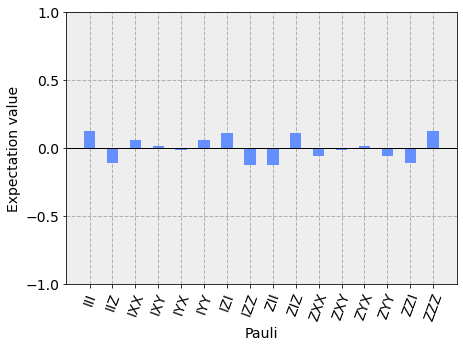

In [11]:
plot_state_paulivec(psi)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


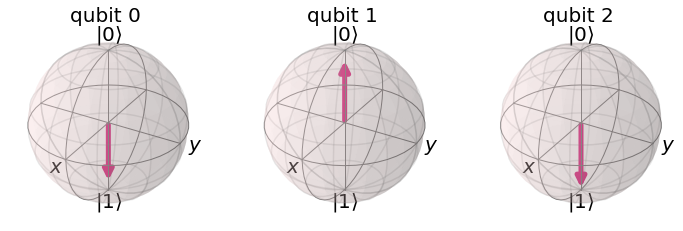

In [12]:
plot_bloch_multivector(psi)